<a href="https://colab.research.google.com/github/lemonslayer/WGU-capstone/blob/main/WGU_Capstone_Tuan_Dat_Doan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection, svm
from sklearn.metrics import ConfusionMatrixDisplay
import time

import pandas as pd
from sklearn import linear_model, metrics, model_selection, svm

#Get data
url = "https://raw.githubusercontent.com/lemonslayer/WGU-capstone/main/Diabetes%20data.csv"
names = ['BMI','Age','Risk']

df = pd.read_csv(url, names = names)
print("Database: ")
print(df)

Database: 
      BMI  Age  Risk
0    33.6   50     1
1    26.6   31     0
2    23.3   32     1
3    28.1   21     0
4    43.1   33     1
..    ...  ...   ...
763  32.9   63     0
764  36.8   27     0
765  26.2   30     0
766  30.1   47     1
767  30.4   23     0

[768 rows x 3 columns]


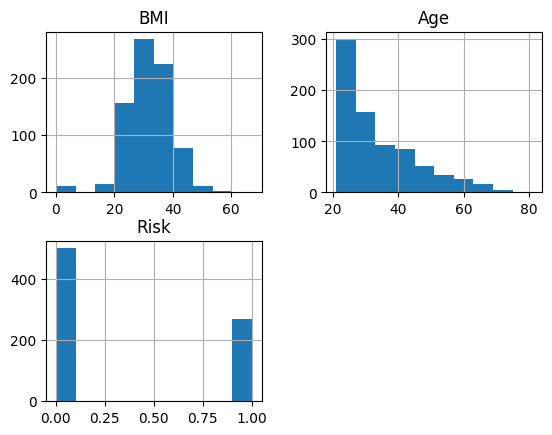

In [2]:
#Histograms
df.hist()
pyplot.show()

array([[<Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='Age', ylabel='BMI'>,
        <Axes: xlabel='Risk', ylabel='BMI'>],
       [<Axes: xlabel='BMI', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Risk', ylabel='Age'>],
       [<Axes: xlabel='BMI', ylabel='Risk'>,
        <Axes: xlabel='Age', ylabel='Risk'>,
        <Axes: xlabel='Risk', ylabel='Risk'>]], dtype=object)

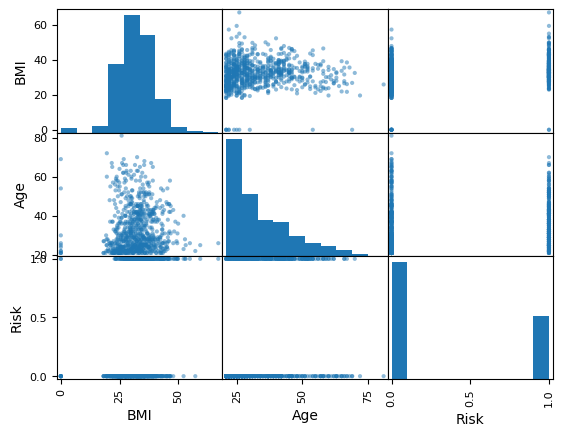

In [3]:
#Scatter plot
scatter_matrix(df)

In [5]:
#Train model
mysvm_model = svm.SVC(max_iter=1000)
y = df.values[:,2]
X = df.values[:,0:2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.3)
mysvm_model.fit(X_train, y_train)
y_pred_svm = mysvm_model.predict(X_test)

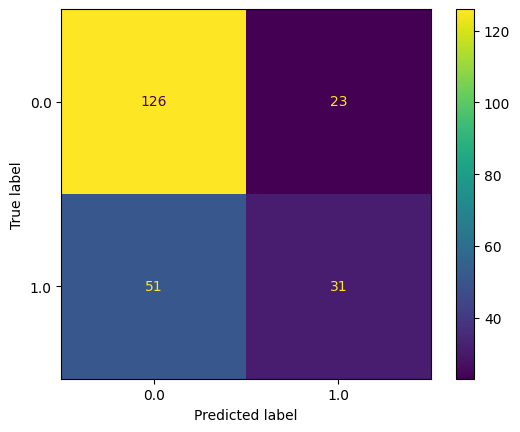

In [6]:
#Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mysvm_model, X_test, y_test);

In [ ]:
#User interface
again = True
while(again == True):
    weight = float(input("Please enter your weight in kg: "))
    height = float(input("Please enter your height in cm: "))/100
    age = int(input("Please enter your age: "))

    BMI = round(weight / (height ** 2),1)
    print("\nYour BMI is: " + str(BMI) + ", and your age is: " + str(age))
    if(mysvm_model.predict([[BMI, age]])):
        print("--> You have a high risk of diabetes!\n")
    else:

        print("--> You don't have a high risk of diabetes!\n")
    tryAgain = str(input("Do you want to try again? (Y/N)"))
    if(tryAgain == 'N'):
        again = False

Please enter your weight in kg: 67
Please enter your height in cm: 174
Please enter your age: 25

Your BMI is: 22.1, and your age is: 25
--> You don't have a high risk of diabetes!

